# A second analysis of the MUSE spectra (only AS1063 and A370) 

Here we make a series of tests:

    1) Using the same continuum subtracted *spectra*, we measure the emission lines again, this time using ALFA. 
    2) We rederive the metallicity using these new fluxes with the Calzetti and Charlot extinction.    
       

In [1]:
%matplotlib notebook 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import matplotlib.pylab as plt
import numpy as np
from astropy.io import fits
from met_and_ext_mcmc import fit_metallicity_and_extinction,print_ratios_ids,make_obs_file
from astropy.stats import sigma_clipped_stats

## Prepare files

In [9]:
as1063_z = 0.611
as1063_header = fits.getheader('../Data/P18_spectra/Spectrum_AS1063_ContSub_pPXF.fits',ext=1)
as1063_header['CRVAL1'] /= (1+as1063_z)
as1063_header['CDELT1'] /= (1+as1063_z) 
as1063_sp = fits.getdata('../Data/P18_spectra/Spectrum_AS1063_ContSub_pPXF.fits')
fits.writeto('../Data/P18_spectra/Spectrum_AS1063_ContSub_pPXF_restframe.fits',as1063_sp*1e-20*(1+as1063_z), as1063_header,output_verify='fix',clobber=True)
as1063_sp = fits.getdata('../Data/P18_spectra/Spectrum_AS1063_CMSub_PhotomNorm.fits')
fits.writeto('../Data/P18_spectra/Spectrum_AS1063_CMSub_PhotomNorm_restframe.fits',as1063_sp*1e-20*(1+as1063_z), as1063_header,output_verify='fix',clobber=True)


a370_z = 0.725
a370_header = fits.getheader('../Data/P18_spectra/Spectrum_A370_ContSub_pPXF.fits',ext=1)
a370_header['CRVAL1'] /= (1+a370_z)
a370_header['CDELT1'] /= (1+a370_z)
a370_sp = fits.getdata('../Data/P18_spectra/Spectrum_AS1063_ContSub_pPXF.fits')
fits.writeto('../Data/P18_spectra/Spectrum_A370_ContSub_pPXF_restframe.fits',a370_sp*1e-20*(1+a370_z), as1063_header,output_verify='fix',clobber=True)
a370_sp = fits.getdata('../Data/P18_spectra/Spectrum_A370_mosaic_CMSub.fits')
fits.writeto('../Data/P18_spectra/Spectrum_A370_mosaic_CMSub_restframe.fits',a370_sp*1e-20*(1+a370_z), as1063_header,output_verify='fix',clobber=True)

macs1206_z = 1.0366
macs1206_header = fits.getheader('../Data/P18_spectra/Spectrum_MACS1206_ContSub_pPXF.fits',ext=1)
macs1206_header['CRVAL1'] /= (1+macs1206_z)
macs1206_header['CDELT1'] /= (1+macs1206_z)
macs1206_sp = fits.getdata('../Data/P18_spectra/Spectrum_MACS1206_ContSub_pPXF.fits')
fits.writeto('../Data/P18_spectra/Spectrum_MACS1206_ContSub_pPXF_restframe.fits',macs1206_sp*1e-20*(1+macs1206_z), as1063_header,output_verify='fix',clobber=True)
macs1206_sp = fits.getdata('../Data/P18_spectra/Spectrum_MACS1206_arc_CMSub_PhotomNorm.fits')
fits.writeto('../Data/P18_spectra/Spectrum_MACS1206_arc_CMSub_PhotomNorm_restframe.fits',macs1206_sp*1e-20*(1+macs1206_z), as1063_header,output_verify='fix',clobber=True)

Measure with alfa

> python fit_alpha.py

## Measure metallicity

In [20]:
def prepare_array(filename,cont_filename,cont_region):
    
    lbd, f, err, fwhm  = np.genfromtxt(filename,unpack=True,usecols=(1,2,3,5))
    lbd = list(lbd)

    cont = fits.getdata(cont_filename)
    cont_mean,_, cont_noise = sigma_clipped_stats(cont[cont_region[0]:cont_region[1]]) # empty of emission lines
    
    flx = []
    unc = []

    for l in[3726.03, 3728.82, 3868.75, 3971.55,4101.74 ,4340.47, 4861.33, 4958.91, 5006.84]:
        try:
            flx.append(f[lbd.index(l)])
            unc.append( np.sqrt(err[lbd.index(l)]**2 + (cont_noise * np.sqrt( 3./2.355*fwhm[lbd.index(l)] + abs(f[lbd.index(l)]/cont_mean/0.725) ))**2))
        except ValueError:
            flx.append(np.nan)
            unc.append(np.nan)
    
    # Put in in the correct order:
          #'[OII]3727',  '[NeIII]','H7',    'Hd',  'Hg',  'Hb',  '[OIII]4959','[OIII]5007','Ha','[NII]6584'
    data = [flx[0]+flx[1],                 flx[2],  flx[3], flx[4], flx[5], flx[6],   flx[7], flx[8], np.nan, np.nan]
    err  = [np.sqrt(unc[0]**2+unc[1]**2),  unc[2],  unc[3], unc[4], unc[5], unc[6],   unc[7], flx[8], np.nan, np.nan]

    return data, err

## Prepare input files
flux, uncertainties = prepare_array('alfa_fits/Spectrum_AS1063_ContSub_pPXF_restframe.fits_lines',
                                   '../Data/P18_spectra/Spectrum_AS1063_CMSub_PhotomNorm_restframe.fits',[2000,2300])
make_obs_file(flux,uncertainties,'as1063.obs')

flux, uncertainties = prepare_array('alfa_fits/Spectrum_A370_ContSub_pPXF_restframe.fits_lines',
                                   '../Data/P18_spectra/Spectrum_A370_ContSub_pPXF_restframe.fits',[2400,2700])
make_obs_file(flux,uncertainties,'a370.obs')

### As in P18
    with Calzetti
    with Charlot

In [2]:
print_ratios_ids()

[0] OIII5007/Hb
[1] OII3727/Hb
[2] OIII5007/OII3727
[3] R23
[4] NeIII3870/OII3727
[5] NII6584/Ha
[6] OIII5007/OIII4949
[7] Hd/H7
[8] Hg/H7
[9] Hg/Hd
[10] Hb/Hd
[11] Hb/Hg
[12] Hb/H7
[13] Ha/Hg
[14] Ha/Hd
[15] Ha/H7


## AS1063
#### All line ratios

MCMCing for 200 steps
 0.0%
49.7%
99.4%


<IPython.core.display.Javascript object>


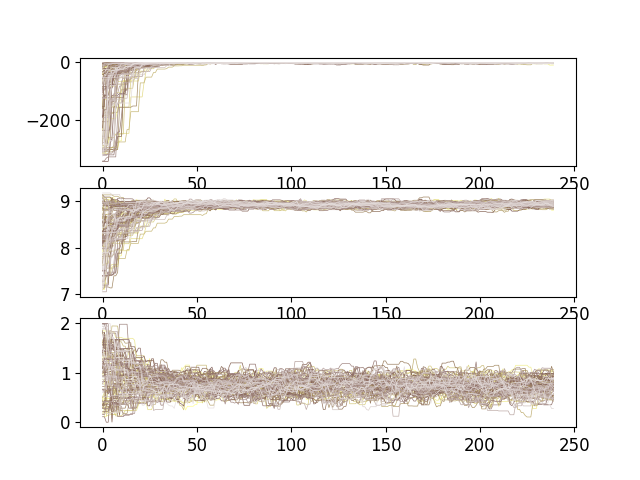

<IPython.core.display.Javascript object>


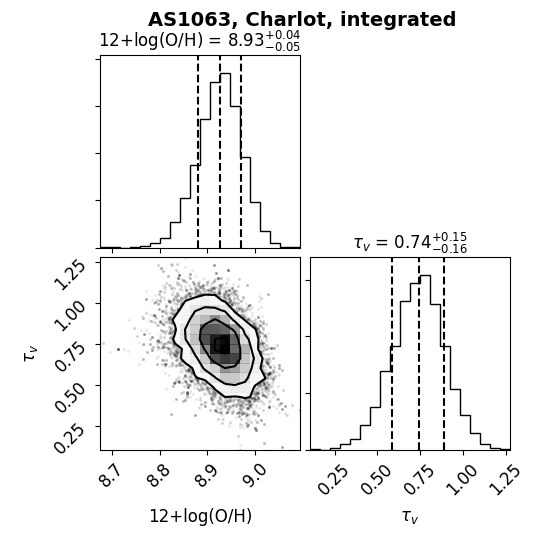

Metallicity : 8.93$^{+0.04}_{-0.05}$
Extinction : 0.74$^{+0.15}_{-0.16}$


In [6]:
mid_m,err_m,mid_t,err_t,samples= fit_metallicity_and_extinction('as1063.obs',t_range=(0,2),m_range=(7.0,9.2),include=[0,1,2,3,4,6,11,10,9,8],
                                                                     extincion_law='CharlotFall',nsteps=200,save=False,plot_title='AS1063, Charlot, integrated')

MCMCing for 200 steps
 0.0%
49.7%
99.4%


<IPython.core.display.Javascript object>


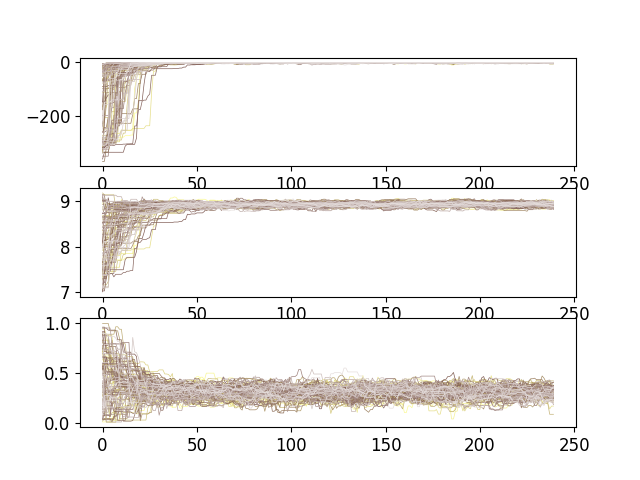

<IPython.core.display.Javascript object>


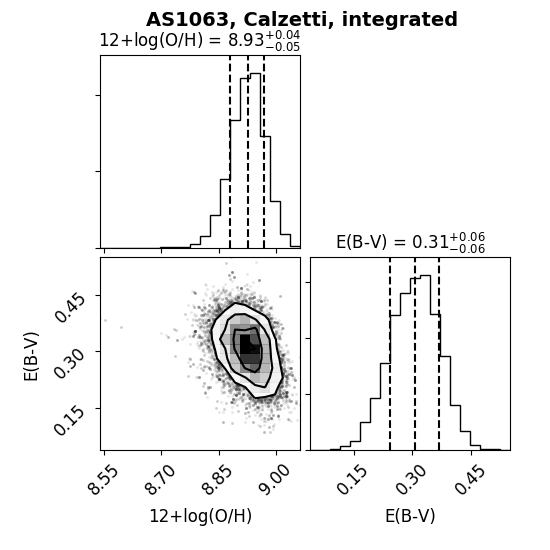

Metallicity : 8.93$^{+0.04}_{-0.05}$
Extinction : 0.31$^{+0.06}_{-0.06}$


In [10]:
mid_m,err_m,mid_t,err_t,samples= fit_metallicity_and_extinction('as1063.obs',t_range=(0,1),m_range=(7.0,9.2),include=[0,1,2,3,4,6,11,10,9,8],
                                                                     extincion_law='Calzetti',nsteps=200,save=False,plot_title='AS1063, Calzetti, integrated')

## A370
### All ratios

MCMCing for 100 steps
 0.0%
98.8%


<IPython.core.display.Javascript object>


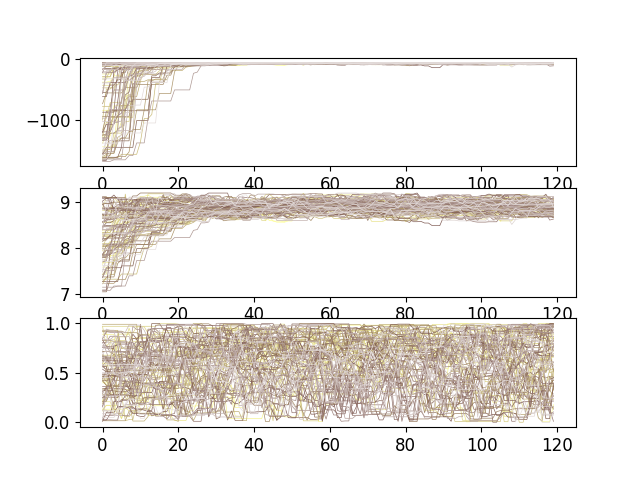

<IPython.core.display.Javascript object>


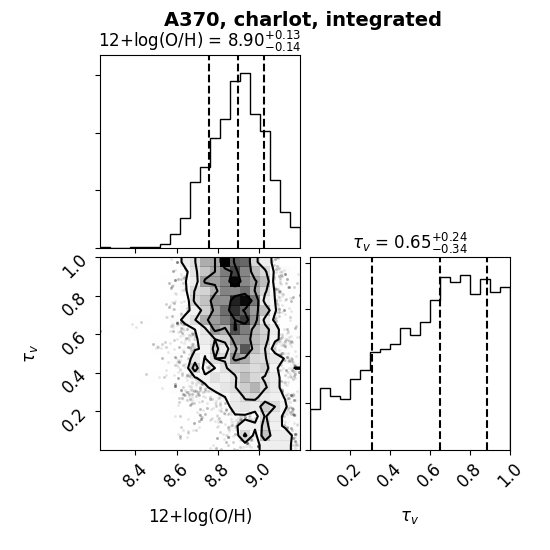

Metallicity : 8.90$^{+0.13}_{-0.14}$
Extinction : 0.65$^{+0.24}_{-0.34}$


In [11]:
mid_m,err_m,mid_t,err_t,samples= fit_metallicity_and_extinction('a370.obs',t_range=(0,1),m_range=(7.0,9.2),include=[0,1,2,3,4,6,11,10,9,8],
                                                                     extincion_law='CharlotFall',nsteps=100,save=False,plot_title='A370, charlot, integrated')

MCMCing for 100 steps
 0.0%
98.8%


<IPython.core.display.Javascript object>


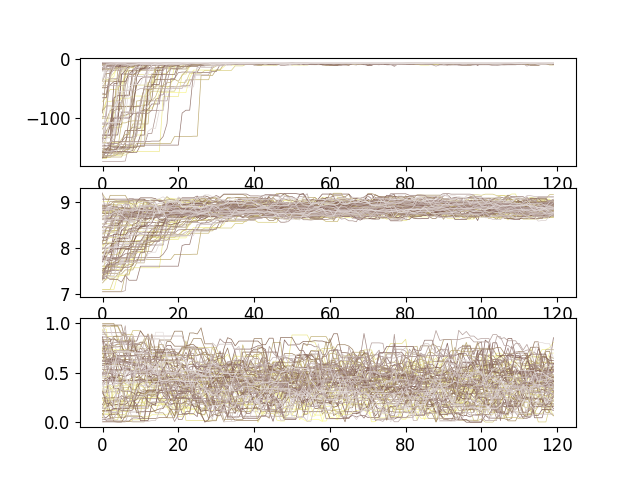

<IPython.core.display.Javascript object>


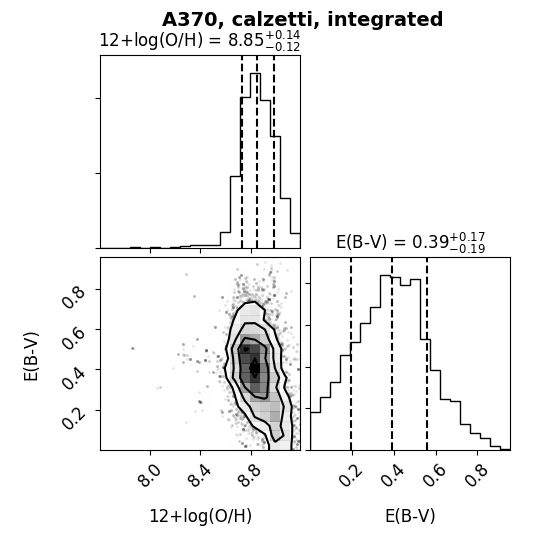

Metallicity : 8.85$^{+0.14}_{-0.12}$
Extinction : 0.39$^{+0.17}_{-0.19}$


In [8]:
mid_m,err_m,mid_t,err_t,samples= fit_metallicity_and_extinction('a370.obs',t_range=(0,1),m_range=(7.0,9.2),include=[0,1,2,3,4,6,11,10,9,8],
                                                                     extincion_law='Calzetti',nsteps=100,save=False,plot_title='A370, Calzetti, integrated')

## AS1063
#### Only resolved metallicity ratios

In [12]:
mid_m,err_m,mid_t,err_t,samples= fit_metallicity_and_extinction('as1063.obs',t_range=(0,2),m_range=(7.0,9.2),include=[0,1,2,3,6,11],
                                                                     extincion_law='CharlotFall',nsteps=200,save=False,plot_title=None)

MCMCing for 200 steps
 0.0%
49.7%
99.4%
Metallicity : 8.76$^{+0.10}_{-0.09}$
Extinction : 1.10$^{+0.20}_{-0.21}$


In [13]:
mid_m,err_m,mid_t,err_t,samples= fit_metallicity_and_extinction('as1063.obs',t_range=(0,1),m_range=(7.0,9.2),include=[0,1,2,3,6,11],
                                                                     extincion_law='Calzetti',nsteps=200,save=False,plot_title=None)

MCMCing for 200 steps
 0.0%
49.7%
99.4%
Metallicity : 8.75$^{+0.10}_{-0.09}$
Extinction : 0.46$^{+0.08}_{-0.09}$


## A370
#### Only resolved metallicity ratios

In [16]:
mid_m,err_m,mid_t,err_t,samples= fit_metallicity_and_extinction('a370.obs',t_range=(0,2.),m_range=(7.0,9.2),include=[0,1,2,3,6,11],
                                                                     extincion_law='CharlotFall',nsteps=100,save=False,plot_title=None)

MCMCing for 100 steps
 0.0%
98.8%
Metallicity : 8.80$^{+0.16}_{-0.16}$
Extinction : 0.88$^{+0.48}_{-0.44}$


In [15]:
mid_m,err_m,mid_t,err_t,samples= fit_metallicity_and_extinction('a370.obs',t_range=(0,1),m_range=(7.0,9.2),include=[0,1,2,3,6,11],
                                                                     extincion_law='Calzetti',nsteps=100,save=False,plot_title=None)

MCMCing for 100 steps
 0.0%
98.8%
Metallicity : 8.81$^{+0.17}_{-0.14}$
Extinction : 0.38$^{+0.19}_{-0.19}$
